# Exercise 32 - Linear Regression with Gradient Descent

This example looks at the application of gradient descent to our linear model.  Again we will use our first linear model:

$$ y = mx + b$$

But we will rewrite in the more convenient form:

$$ h(x) = \sum_{i=0}^N \Theta_i x_i$$

where $x_0 = 1$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reload the data from the previous exercise

In [2]:
df = pd.read_csv('synth_temp.csv')
df = df.loc[df.Year > 1901]
df_group_year = df.groupby('Year').agg(np.mean)

# Moving average
window = 10
rolling = df_group_year.AverageTemperature.rolling(window).mean();

df_group_year['Year'] = df_group_year.index

In [3]:
def h_x(weights, x):
    return np.dot(weights, x).flatten()

Scale the values to be between 0 and 1 by dividing by the maximum value.

As we are assigning $x_0 = 1$ we need to insert a row of ones into our training data

In [4]:
x = np.ones((2, len(df_group_year)))
x[0,:] = df_group_year.Year
x[1,:] = 1
x /= x.max()
x[:,:5]

array([[9.46268657e-01, 9.46766169e-01, 9.47263682e-01, 9.47761194e-01,
        9.48258706e-01],
       [4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04]])

Initialise the random number generator with a constant value to ensure the original random number remains consistent.

In [5]:
np.random.seed(255) # Ensure the same starting random values

We will also use random values between 0 and 1 as our initial guesses for $\Theta$.  We want our initial values to be close to 0, but still random.

In [6]:
Theta = np.random.randn(2).reshape((1, 2)) * 0.1
Theta

array([[-0.15134119, -0.01970609]])

We will also define our ground truth values

In [7]:
y_true = df_group_year.AverageTemperature.values

The cost function is also required for gradient descent.  So define J_theta

In [8]:
def J_theta(pred, true):
    return np.mean((pred - true) ** 2) # mean squared error

We also need to define how large a step to take i.e. the learning rate $\gamma$

In [9]:
gamma = 1e-6

We also need to define a function to update the parameters Theta.  As a reminder the equation to update gradient descent is:

$$\Theta_j := \Theta_j + \gamma \sum_{i=1}^N (y_{(i)} - h(x^{(i)}))x_j^{(i)}$$

In [10]:
def update(pred, true, x, gamma):
    return gamma * np.sum((true - pred) * x, axis=1)

Define the maximum number of epochs to train for:

In [11]:
max_epochs = 100000

We will step through the first iteration of gradient descent manually to observe what is going on.  We will first calculate the original error value using the randomly initialised weights.

In [12]:
y_pred = h_x(Theta, x)
print(f'Initial cost J(Theta) = {J_theta(y_pred, y_true): 0.3f}')

Initial cost J(Theta) =  337.025


We will now complete the first update

In [13]:
Theta += update(y_pred, y_true, x, gamma)

y_pred = h_x(Theta, x)
print(f'Initial cost J(Theta) = {J_theta(y_pred, y_true): 0.3f}')

Initial cost J(Theta) =  336.955


Notice the reduction in the error, our training is one the way!!!  Now we will repeat this process for a fixed number of iterations or epochs.

In [14]:
error_hist = []
epoch_hist = []
for epoch in range(max_epochs):
    Theta += update(y_pred, y_true, x, gamma)
    y_pred = h_x(Theta, x)  
    
    if (epoch % 10) == 0:
        _err = J_theta(y_pred, y_true)
        error_hist.append(_err)
        epoch_hist.append(epoch)
        print(f'epoch:{epoch:4d} J(Theta) = {_err: 9.3f}')

epoch:   0 J(Theta) =   336.886
epoch:  10 J(Theta) =   336.191
epoch:  20 J(Theta) =   335.499
epoch:  30 J(Theta) =   334.807
epoch:  40 J(Theta) =   334.117
epoch:  50 J(Theta) =   333.428
epoch:  60 J(Theta) =   332.741
epoch:  70 J(Theta) =   332.055
epoch:  80 J(Theta) =   331.371
epoch:  90 J(Theta) =   330.688
epoch: 100 J(Theta) =   330.006
epoch: 110 J(Theta) =   329.326
epoch: 120 J(Theta) =   328.647
epoch: 130 J(Theta) =   327.969
epoch: 140 J(Theta) =   327.293
epoch: 150 J(Theta) =   326.619
epoch: 160 J(Theta) =   325.946
epoch: 170 J(Theta) =   325.274
epoch: 180 J(Theta) =   324.603
epoch: 190 J(Theta) =   323.934
epoch: 200 J(Theta) =   323.267
epoch: 210 J(Theta) =   322.600
epoch: 220 J(Theta) =   321.935
epoch: 230 J(Theta) =   321.272
epoch: 240 J(Theta) =   320.609
epoch: 250 J(Theta) =   319.949
epoch: 260 J(Theta) =   319.289
epoch: 270 J(Theta) =   318.631
epoch: 280 J(Theta) =   317.974
epoch: 290 J(Theta) =   317.319
epoch: 300 J(Theta) =   316.665
epoch: 3

epoch:4570 J(Theta) =   131.273
epoch:4580 J(Theta) =   131.003
epoch:4590 J(Theta) =   130.733
epoch:4600 J(Theta) =   130.464
epoch:4610 J(Theta) =   130.196
epoch:4620 J(Theta) =   129.928
epoch:4630 J(Theta) =   129.660
epoch:4640 J(Theta) =   129.393
epoch:4650 J(Theta) =   129.127
epoch:4660 J(Theta) =   128.861
epoch:4670 J(Theta) =   128.596
epoch:4680 J(Theta) =   128.331
epoch:4690 J(Theta) =   128.067
epoch:4700 J(Theta) =   127.803
epoch:4710 J(Theta) =   127.540
epoch:4720 J(Theta) =   127.278
epoch:4730 J(Theta) =   127.016
epoch:4740 J(Theta) =   126.754
epoch:4750 J(Theta) =   126.493
epoch:4760 J(Theta) =   126.233
epoch:4770 J(Theta) =   125.973
epoch:4780 J(Theta) =   125.714
epoch:4790 J(Theta) =   125.455
epoch:4800 J(Theta) =   125.197
epoch:4810 J(Theta) =   124.939
epoch:4820 J(Theta) =   124.682
epoch:4830 J(Theta) =   124.425
epoch:4840 J(Theta) =   124.169
epoch:4850 J(Theta) =   123.914
epoch:4860 J(Theta) =   123.658
epoch:4870 J(Theta) =   123.404
epoch:48

epoch:10210 J(Theta) =    41.148
epoch:10220 J(Theta) =    41.064
epoch:10230 J(Theta) =    40.980
epoch:10240 J(Theta) =    40.896
epoch:10250 J(Theta) =    40.812
epoch:10260 J(Theta) =    40.728
epoch:10270 J(Theta) =    40.645
epoch:10280 J(Theta) =    40.562
epoch:10290 J(Theta) =    40.479
epoch:10300 J(Theta) =    40.396
epoch:10310 J(Theta) =    40.313
epoch:10320 J(Theta) =    40.230
epoch:10330 J(Theta) =    40.148
epoch:10340 J(Theta) =    40.066
epoch:10350 J(Theta) =    39.983
epoch:10360 J(Theta) =    39.902
epoch:10370 J(Theta) =    39.820
epoch:10380 J(Theta) =    39.738
epoch:10390 J(Theta) =    39.657
epoch:10400 J(Theta) =    39.576
epoch:10410 J(Theta) =    39.494
epoch:10420 J(Theta) =    39.414
epoch:10430 J(Theta) =    39.333
epoch:10440 J(Theta) =    39.252
epoch:10450 J(Theta) =    39.172
epoch:10460 J(Theta) =    39.092
epoch:10470 J(Theta) =    39.012
epoch:10480 J(Theta) =    38.932
epoch:10490 J(Theta) =    38.852
epoch:10500 J(Theta) =    38.772
epoch:1051

epoch:16310 J(Theta) =    11.872
epoch:16320 J(Theta) =    11.848
epoch:16330 J(Theta) =    11.824
epoch:16340 J(Theta) =    11.801
epoch:16350 J(Theta) =    11.777
epoch:16360 J(Theta) =    11.753
epoch:16370 J(Theta) =    11.729
epoch:16380 J(Theta) =    11.706
epoch:16390 J(Theta) =    11.682
epoch:16400 J(Theta) =    11.659
epoch:16410 J(Theta) =    11.635
epoch:16420 J(Theta) =    11.612
epoch:16430 J(Theta) =    11.588
epoch:16440 J(Theta) =    11.565
epoch:16450 J(Theta) =    11.542
epoch:16460 J(Theta) =    11.518
epoch:16470 J(Theta) =    11.495
epoch:16480 J(Theta) =    11.472
epoch:16490 J(Theta) =    11.449
epoch:16500 J(Theta) =    11.426
epoch:16510 J(Theta) =    11.403
epoch:16520 J(Theta) =    11.380
epoch:16530 J(Theta) =    11.357
epoch:16540 J(Theta) =    11.334
epoch:16550 J(Theta) =    11.311
epoch:16560 J(Theta) =    11.289
epoch:16570 J(Theta) =    11.266
epoch:16580 J(Theta) =    11.243
epoch:16590 J(Theta) =    11.221
epoch:16600 J(Theta) =    11.198
epoch:1661

epoch:22920 J(Theta) =     3.236
epoch:22930 J(Theta) =     3.230
epoch:22940 J(Theta) =     3.224
epoch:22950 J(Theta) =     3.218
epoch:22960 J(Theta) =     3.212
epoch:22970 J(Theta) =     3.206
epoch:22980 J(Theta) =     3.200
epoch:22990 J(Theta) =     3.194
epoch:23000 J(Theta) =     3.188
epoch:23010 J(Theta) =     3.182
epoch:23020 J(Theta) =     3.176
epoch:23030 J(Theta) =     3.170
epoch:23040 J(Theta) =     3.164
epoch:23050 J(Theta) =     3.158
epoch:23060 J(Theta) =     3.152
epoch:23070 J(Theta) =     3.146
epoch:23080 J(Theta) =     3.140
epoch:23090 J(Theta) =     3.134
epoch:23100 J(Theta) =     3.128
epoch:23110 J(Theta) =     3.122
epoch:23120 J(Theta) =     3.117
epoch:23130 J(Theta) =     3.111
epoch:23140 J(Theta) =     3.105
epoch:23150 J(Theta) =     3.099
epoch:23160 J(Theta) =     3.093
epoch:23170 J(Theta) =     3.087
epoch:23180 J(Theta) =     3.082
epoch:23190 J(Theta) =     3.076
epoch:23200 J(Theta) =     3.070
epoch:23210 J(Theta) =     3.064
epoch:2322

epoch:29130 J(Theta) =     1.096
epoch:29140 J(Theta) =     1.095
epoch:29150 J(Theta) =     1.093
epoch:29160 J(Theta) =     1.091
epoch:29170 J(Theta) =     1.089
epoch:29180 J(Theta) =     1.088
epoch:29190 J(Theta) =     1.086
epoch:29200 J(Theta) =     1.084
epoch:29210 J(Theta) =     1.083
epoch:29220 J(Theta) =     1.081
epoch:29230 J(Theta) =     1.079
epoch:29240 J(Theta) =     1.078
epoch:29250 J(Theta) =     1.076
epoch:29260 J(Theta) =     1.074
epoch:29270 J(Theta) =     1.073
epoch:29280 J(Theta) =     1.071
epoch:29290 J(Theta) =     1.070
epoch:29300 J(Theta) =     1.068
epoch:29310 J(Theta) =     1.066
epoch:29320 J(Theta) =     1.065
epoch:29330 J(Theta) =     1.063
epoch:29340 J(Theta) =     1.061
epoch:29350 J(Theta) =     1.060
epoch:29360 J(Theta) =     1.058
epoch:29370 J(Theta) =     1.056
epoch:29380 J(Theta) =     1.055
epoch:29390 J(Theta) =     1.053
epoch:29400 J(Theta) =     1.052
epoch:29410 J(Theta) =     1.050
epoch:29420 J(Theta) =     1.048
epoch:2943

epoch:35260 J(Theta) =     0.506
epoch:35270 J(Theta) =     0.506
epoch:35280 J(Theta) =     0.505
epoch:35290 J(Theta) =     0.505
epoch:35300 J(Theta) =     0.504
epoch:35310 J(Theta) =     0.504
epoch:35320 J(Theta) =     0.504
epoch:35330 J(Theta) =     0.503
epoch:35340 J(Theta) =     0.503
epoch:35350 J(Theta) =     0.502
epoch:35360 J(Theta) =     0.502
epoch:35370 J(Theta) =     0.501
epoch:35380 J(Theta) =     0.501
epoch:35390 J(Theta) =     0.500
epoch:35400 J(Theta) =     0.500
epoch:35410 J(Theta) =     0.499
epoch:35420 J(Theta) =     0.499
epoch:35430 J(Theta) =     0.498
epoch:35440 J(Theta) =     0.498
epoch:35450 J(Theta) =     0.497
epoch:35460 J(Theta) =     0.497
epoch:35470 J(Theta) =     0.497
epoch:35480 J(Theta) =     0.496
epoch:35490 J(Theta) =     0.496
epoch:35500 J(Theta) =     0.495
epoch:35510 J(Theta) =     0.495
epoch:35520 J(Theta) =     0.494
epoch:35530 J(Theta) =     0.494
epoch:35540 J(Theta) =     0.493
epoch:35550 J(Theta) =     0.493
epoch:3556

epoch:41380 J(Theta) =     0.340
epoch:41390 J(Theta) =     0.340
epoch:41400 J(Theta) =     0.340
epoch:41410 J(Theta) =     0.340
epoch:41420 J(Theta) =     0.340
epoch:41430 J(Theta) =     0.340
epoch:41440 J(Theta) =     0.339
epoch:41450 J(Theta) =     0.339
epoch:41460 J(Theta) =     0.339
epoch:41470 J(Theta) =     0.339
epoch:41480 J(Theta) =     0.339
epoch:41490 J(Theta) =     0.339
epoch:41500 J(Theta) =     0.339
epoch:41510 J(Theta) =     0.338
epoch:41520 J(Theta) =     0.338
epoch:41530 J(Theta) =     0.338
epoch:41540 J(Theta) =     0.338
epoch:41550 J(Theta) =     0.338
epoch:41560 J(Theta) =     0.338
epoch:41570 J(Theta) =     0.338
epoch:41580 J(Theta) =     0.338
epoch:41590 J(Theta) =     0.337
epoch:41600 J(Theta) =     0.337
epoch:41610 J(Theta) =     0.337
epoch:41620 J(Theta) =     0.337
epoch:41630 J(Theta) =     0.337
epoch:41640 J(Theta) =     0.337
epoch:41650 J(Theta) =     0.337
epoch:41660 J(Theta) =     0.337
epoch:41670 J(Theta) =     0.336
epoch:4168

epoch:47990 J(Theta) =     0.291
epoch:48000 J(Theta) =     0.291
epoch:48010 J(Theta) =     0.291
epoch:48020 J(Theta) =     0.291
epoch:48030 J(Theta) =     0.291
epoch:48040 J(Theta) =     0.291
epoch:48050 J(Theta) =     0.291
epoch:48060 J(Theta) =     0.291
epoch:48070 J(Theta) =     0.291
epoch:48080 J(Theta) =     0.291
epoch:48090 J(Theta) =     0.291
epoch:48100 J(Theta) =     0.291
epoch:48110 J(Theta) =     0.291
epoch:48120 J(Theta) =     0.291
epoch:48130 J(Theta) =     0.291
epoch:48140 J(Theta) =     0.291
epoch:48150 J(Theta) =     0.291
epoch:48160 J(Theta) =     0.291
epoch:48170 J(Theta) =     0.291
epoch:48180 J(Theta) =     0.291
epoch:48190 J(Theta) =     0.291
epoch:48200 J(Theta) =     0.291
epoch:48210 J(Theta) =     0.291
epoch:48220 J(Theta) =     0.291
epoch:48230 J(Theta) =     0.291
epoch:48240 J(Theta) =     0.291
epoch:48250 J(Theta) =     0.291
epoch:48260 J(Theta) =     0.291
epoch:48270 J(Theta) =     0.291
epoch:48280 J(Theta) =     0.290
epoch:4829

epoch:54300 J(Theta) =     0.279
epoch:54310 J(Theta) =     0.279
epoch:54320 J(Theta) =     0.279
epoch:54330 J(Theta) =     0.279
epoch:54340 J(Theta) =     0.279
epoch:54350 J(Theta) =     0.279
epoch:54360 J(Theta) =     0.279
epoch:54370 J(Theta) =     0.279
epoch:54380 J(Theta) =     0.279
epoch:54390 J(Theta) =     0.279
epoch:54400 J(Theta) =     0.279
epoch:54410 J(Theta) =     0.279
epoch:54420 J(Theta) =     0.279
epoch:54430 J(Theta) =     0.279
epoch:54440 J(Theta) =     0.279
epoch:54450 J(Theta) =     0.279
epoch:54460 J(Theta) =     0.279
epoch:54470 J(Theta) =     0.279
epoch:54480 J(Theta) =     0.279
epoch:54490 J(Theta) =     0.279
epoch:54500 J(Theta) =     0.279
epoch:54510 J(Theta) =     0.279
epoch:54520 J(Theta) =     0.279
epoch:54530 J(Theta) =     0.279
epoch:54540 J(Theta) =     0.279
epoch:54550 J(Theta) =     0.279
epoch:54560 J(Theta) =     0.279
epoch:54570 J(Theta) =     0.279
epoch:54580 J(Theta) =     0.279
epoch:54590 J(Theta) =     0.279
epoch:5460

epoch:60840 J(Theta) =     0.276
epoch:60850 J(Theta) =     0.276
epoch:60860 J(Theta) =     0.276
epoch:60870 J(Theta) =     0.276
epoch:60880 J(Theta) =     0.276
epoch:60890 J(Theta) =     0.276
epoch:60900 J(Theta) =     0.276
epoch:60910 J(Theta) =     0.276
epoch:60920 J(Theta) =     0.276
epoch:60930 J(Theta) =     0.276
epoch:60940 J(Theta) =     0.276
epoch:60950 J(Theta) =     0.276
epoch:60960 J(Theta) =     0.276
epoch:60970 J(Theta) =     0.276
epoch:60980 J(Theta) =     0.276
epoch:60990 J(Theta) =     0.276
epoch:61000 J(Theta) =     0.276
epoch:61010 J(Theta) =     0.276
epoch:61020 J(Theta) =     0.276
epoch:61030 J(Theta) =     0.276
epoch:61040 J(Theta) =     0.276
epoch:61050 J(Theta) =     0.276
epoch:61060 J(Theta) =     0.276
epoch:61070 J(Theta) =     0.276
epoch:61080 J(Theta) =     0.276
epoch:61090 J(Theta) =     0.276
epoch:61100 J(Theta) =     0.276
epoch:61110 J(Theta) =     0.276
epoch:61120 J(Theta) =     0.276
epoch:61130 J(Theta) =     0.276
epoch:6114

epoch:67510 J(Theta) =     0.275
epoch:67520 J(Theta) =     0.275
epoch:67530 J(Theta) =     0.275
epoch:67540 J(Theta) =     0.275
epoch:67550 J(Theta) =     0.275
epoch:67560 J(Theta) =     0.275
epoch:67570 J(Theta) =     0.275
epoch:67580 J(Theta) =     0.275
epoch:67590 J(Theta) =     0.275
epoch:67600 J(Theta) =     0.275
epoch:67610 J(Theta) =     0.275
epoch:67620 J(Theta) =     0.275
epoch:67630 J(Theta) =     0.275
epoch:67640 J(Theta) =     0.275
epoch:67650 J(Theta) =     0.275
epoch:67660 J(Theta) =     0.275
epoch:67670 J(Theta) =     0.275
epoch:67680 J(Theta) =     0.275
epoch:67690 J(Theta) =     0.275
epoch:67700 J(Theta) =     0.275
epoch:67710 J(Theta) =     0.275
epoch:67720 J(Theta) =     0.275
epoch:67730 J(Theta) =     0.275
epoch:67740 J(Theta) =     0.275
epoch:67750 J(Theta) =     0.275
epoch:67760 J(Theta) =     0.275
epoch:67770 J(Theta) =     0.275
epoch:67780 J(Theta) =     0.275
epoch:67790 J(Theta) =     0.275
epoch:67800 J(Theta) =     0.275
epoch:6781

epoch:73990 J(Theta) =     0.275
epoch:74000 J(Theta) =     0.275
epoch:74010 J(Theta) =     0.275
epoch:74020 J(Theta) =     0.275
epoch:74030 J(Theta) =     0.275
epoch:74040 J(Theta) =     0.275
epoch:74050 J(Theta) =     0.275
epoch:74060 J(Theta) =     0.275
epoch:74070 J(Theta) =     0.275
epoch:74080 J(Theta) =     0.275
epoch:74090 J(Theta) =     0.275
epoch:74100 J(Theta) =     0.275
epoch:74110 J(Theta) =     0.275
epoch:74120 J(Theta) =     0.275
epoch:74130 J(Theta) =     0.275
epoch:74140 J(Theta) =     0.275
epoch:74150 J(Theta) =     0.275
epoch:74160 J(Theta) =     0.275
epoch:74170 J(Theta) =     0.275
epoch:74180 J(Theta) =     0.275
epoch:74190 J(Theta) =     0.275
epoch:74200 J(Theta) =     0.275
epoch:74210 J(Theta) =     0.275
epoch:74220 J(Theta) =     0.275
epoch:74230 J(Theta) =     0.275
epoch:74240 J(Theta) =     0.275
epoch:74250 J(Theta) =     0.275
epoch:74260 J(Theta) =     0.275
epoch:74270 J(Theta) =     0.275
epoch:74280 J(Theta) =     0.275
epoch:7429

epoch:80410 J(Theta) =     0.275
epoch:80420 J(Theta) =     0.275
epoch:80430 J(Theta) =     0.275
epoch:80440 J(Theta) =     0.275
epoch:80450 J(Theta) =     0.275
epoch:80460 J(Theta) =     0.275
epoch:80470 J(Theta) =     0.275
epoch:80480 J(Theta) =     0.275
epoch:80490 J(Theta) =     0.275
epoch:80500 J(Theta) =     0.275
epoch:80510 J(Theta) =     0.275
epoch:80520 J(Theta) =     0.275
epoch:80530 J(Theta) =     0.275
epoch:80540 J(Theta) =     0.275
epoch:80550 J(Theta) =     0.275
epoch:80560 J(Theta) =     0.275
epoch:80570 J(Theta) =     0.275
epoch:80580 J(Theta) =     0.275
epoch:80590 J(Theta) =     0.275
epoch:80600 J(Theta) =     0.275
epoch:80610 J(Theta) =     0.275
epoch:80620 J(Theta) =     0.275
epoch:80630 J(Theta) =     0.275
epoch:80640 J(Theta) =     0.275
epoch:80650 J(Theta) =     0.275
epoch:80660 J(Theta) =     0.275
epoch:80670 J(Theta) =     0.275
epoch:80680 J(Theta) =     0.275
epoch:80690 J(Theta) =     0.275
epoch:80700 J(Theta) =     0.275
epoch:8071

epoch:86710 J(Theta) =     0.275
epoch:86720 J(Theta) =     0.275
epoch:86730 J(Theta) =     0.275
epoch:86740 J(Theta) =     0.275
epoch:86750 J(Theta) =     0.275
epoch:86760 J(Theta) =     0.275
epoch:86770 J(Theta) =     0.275
epoch:86780 J(Theta) =     0.275
epoch:86790 J(Theta) =     0.275
epoch:86800 J(Theta) =     0.275
epoch:86810 J(Theta) =     0.275
epoch:86820 J(Theta) =     0.275
epoch:86830 J(Theta) =     0.275
epoch:86840 J(Theta) =     0.275
epoch:86850 J(Theta) =     0.275
epoch:86860 J(Theta) =     0.275
epoch:86870 J(Theta) =     0.275
epoch:86880 J(Theta) =     0.275
epoch:86890 J(Theta) =     0.275
epoch:86900 J(Theta) =     0.275
epoch:86910 J(Theta) =     0.275
epoch:86920 J(Theta) =     0.275
epoch:86930 J(Theta) =     0.275
epoch:86940 J(Theta) =     0.275
epoch:86950 J(Theta) =     0.275
epoch:86960 J(Theta) =     0.275
epoch:86970 J(Theta) =     0.275
epoch:86980 J(Theta) =     0.275
epoch:86990 J(Theta) =     0.275
epoch:87000 J(Theta) =     0.275
epoch:8701

epoch:93090 J(Theta) =     0.275
epoch:93100 J(Theta) =     0.275
epoch:93110 J(Theta) =     0.275
epoch:93120 J(Theta) =     0.275
epoch:93130 J(Theta) =     0.275
epoch:93140 J(Theta) =     0.275
epoch:93150 J(Theta) =     0.275
epoch:93160 J(Theta) =     0.275
epoch:93170 J(Theta) =     0.275
epoch:93180 J(Theta) =     0.275
epoch:93190 J(Theta) =     0.275
epoch:93200 J(Theta) =     0.275
epoch:93210 J(Theta) =     0.275
epoch:93220 J(Theta) =     0.275
epoch:93230 J(Theta) =     0.275
epoch:93240 J(Theta) =     0.275
epoch:93250 J(Theta) =     0.275
epoch:93260 J(Theta) =     0.275
epoch:93270 J(Theta) =     0.275
epoch:93280 J(Theta) =     0.275
epoch:93290 J(Theta) =     0.275
epoch:93300 J(Theta) =     0.275
epoch:93310 J(Theta) =     0.275
epoch:93320 J(Theta) =     0.275
epoch:93330 J(Theta) =     0.275
epoch:93340 J(Theta) =     0.275
epoch:93350 J(Theta) =     0.275
epoch:93360 J(Theta) =     0.275
epoch:93370 J(Theta) =     0.275
epoch:93380 J(Theta) =     0.275
epoch:9339

epoch:99370 J(Theta) =     0.275
epoch:99380 J(Theta) =     0.275
epoch:99390 J(Theta) =     0.275
epoch:99400 J(Theta) =     0.275
epoch:99410 J(Theta) =     0.275
epoch:99420 J(Theta) =     0.275
epoch:99430 J(Theta) =     0.275
epoch:99440 J(Theta) =     0.275
epoch:99450 J(Theta) =     0.275
epoch:99460 J(Theta) =     0.275
epoch:99470 J(Theta) =     0.275
epoch:99480 J(Theta) =     0.275
epoch:99490 J(Theta) =     0.275
epoch:99500 J(Theta) =     0.275
epoch:99510 J(Theta) =     0.275
epoch:99520 J(Theta) =     0.275
epoch:99530 J(Theta) =     0.275
epoch:99540 J(Theta) =     0.275
epoch:99550 J(Theta) =     0.275
epoch:99560 J(Theta) =     0.275
epoch:99570 J(Theta) =     0.275
epoch:99580 J(Theta) =     0.275
epoch:99590 J(Theta) =     0.275
epoch:99600 J(Theta) =     0.275
epoch:99610 J(Theta) =     0.275
epoch:99620 J(Theta) =     0.275
epoch:99630 J(Theta) =     0.275
epoch:99640 J(Theta) =     0.275
epoch:99650 J(Theta) =     0.275
epoch:99660 J(Theta) =     0.275
epoch:9967

Plot the training history

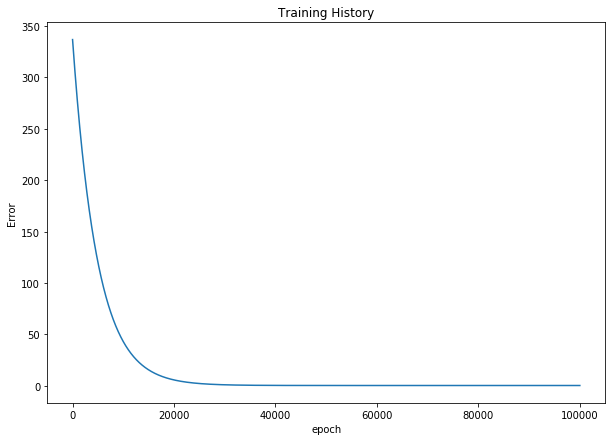

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(epoch_hist, error_hist);
plt.title('Training History');
plt.xlabel('epoch');
plt.ylabel('Error');

In [16]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.5535787754767713

In [17]:
# Use linspace to get a range of values, in 20 yr increments
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
x

array([1902.        , 1907.68421053, 1913.36842105, 1919.05263158,
       1924.73684211, 1930.42105263, 1936.10526316, 1941.78947368,
       1947.47368421, 1953.15789474, 1958.84210526, 1964.52631579,
       1970.21052632, 1975.89473684, 1981.57894737, 1987.26315789,
       1992.94736842, 1998.63157895, 2004.31578947, 2010.        ])

In [18]:
trend_x = np.ones((2, len(x)))
trend_x[0,:] = x
trend_x[1,:] = 1
trend_x /= trend_x.max()
trend_x

array([[9.46268657e-01, 9.49096622e-01, 9.51924588e-01, 9.54752553e-01,
        9.57580518e-01, 9.60408484e-01, 9.63236449e-01, 9.66064415e-01,
        9.68892380e-01, 9.71720346e-01, 9.74548311e-01, 9.77376277e-01,
        9.80204242e-01, 9.83032207e-01, 9.85860173e-01, 9.88688138e-01,
        9.91516104e-01, 9.94344069e-01, 9.97172035e-01, 1.00000000e+00],
       [4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04,
        4.97512438e-04, 4.97512438e-04, 4.97512438e-04, 4.97512438e-04]])

In [19]:
trend_y = h_x(Theta, trend_x)
trend_y

array([17.69802689, 17.75091824, 17.80380958, 17.85670093, 17.90959228,
       17.96248362, 18.01537497, 18.06826631, 18.12115766, 18.174049  ,
       18.22694035, 18.2798317 , 18.33272304, 18.38561439, 18.43850573,
       18.49139708, 18.54428842, 18.59717977, 18.65007111, 18.70296246])

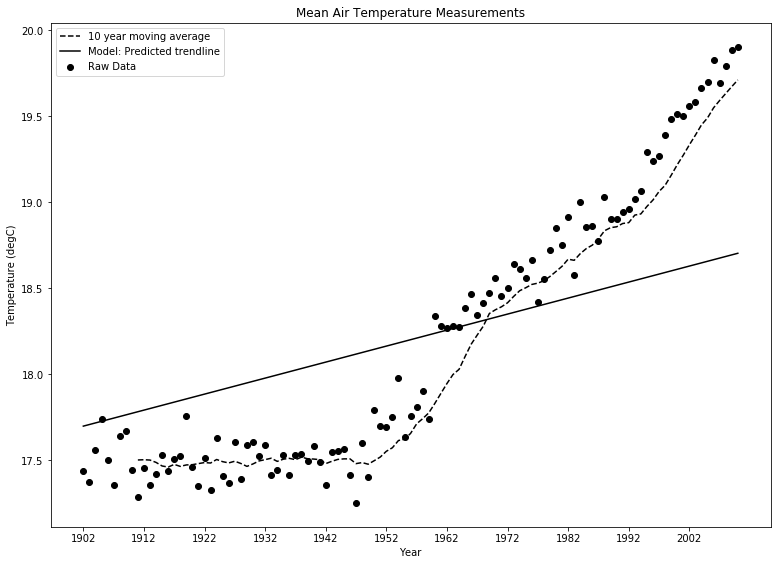

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(x, trend_y, c='k', label='Model: Predicted trendline')


ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();

## Use scikit-learn for gradient descent

Now that we have a good understanding of how gradient descent works, we typically wouldn't implement it ourselves in this way in practice but would leverage the power of scikit-learn.

In [21]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(
    max_iter=100000,
    learning_rate='constant',
    eta0=1e-6,
    random_state=255,
    tol=1e-6,
    penalty='none',
)

In [22]:
x = df_group_year.Year / df_group_year.Year.max()
y_true = df_group_year.AverageTemperature.values.ravel()
model.fit(x.values.reshape((-1, 1)), y_true)

y_pred = model.predict(x.values.reshape((-1, 1)))
r2_score(y_true, y_pred)

0.2968354493880657

In [23]:
x = np.linspace(df_group_year['Year'].min(), df_group_year['Year'].max(), 20)
_x = x/x.max()
trend_y = model.predict(_x.reshape((-1, 1)))

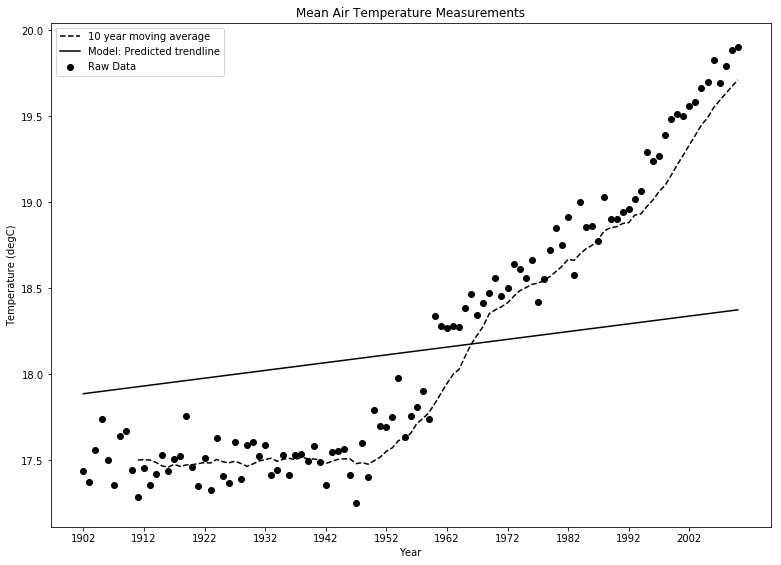

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);

# Temp measurements
ax.scatter(df_group_year.index, df_group_year.AverageTemperature, label='Raw Data', c='k');
ax.plot(df_group_year.index, rolling, c='k', linestyle='--', label=f'{window} year moving average');
ax.plot(x, trend_y, c='k', label='Model: Predicted trendline')


ax.set_title('Mean Air Temperature Measurements')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (degC)')
ax.set_xticks(range(df_group_year.index.min(), df_group_year.index.max(), 10))
ax.legend();